### COURSERA | IBM DATA SCIENCE | WAFFLE CHARTS & WORD CLOUDS
The purpose of this program is to visualize data through waffle charts and word clouds. <br>
This program uses Canadian immigration data from the [U.N. website](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp)

In [1]:
import numpy as np
import pandas as pd

#### PART 1: DOWNLOAD & CLEAN IMMIGRATION DATA FOR WAFFLE CHART

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         154 KB  anaconda

The following packages will be UPDATED:

    ca-certificates: 2019.9.11-hecc5488_0 conda-forge --> 2019.10.16-0     anaconda
    certifi:         2019.9.11-py36_0     conda-forge --> 2019.9.11-py36_0 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda


certifi-2019.9.11    | 154 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                    sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace = True)
df['Total'] =  df.sum(axis = 1)
years = list(map(str, range(1980, 2014)))
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
print('Data Dimensions:', df.shape)

Data Dimensions: (195, 38)


#### PART 2: CALCULATE WAFFLE CHART PROPORTIONS

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')
%matplotlib inline

In [7]:
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [8]:
totals = sum(df_dns['Total'])
proportions = [(float(value) / totals) for value in df_dns['Total']]

for i, proportion in enumerate(proportions):
    print(df_dns.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [9]:
WIDTH = 40
HEIGHT = 10
TILES = WIDTH * HEIGHT

tiles_per_category = [round(proportion * TILES) for proportion in proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dns.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


#### PART 3: VISUALIZE DATA IN WAFFLE CHART

In [10]:
waffle_chart = np.zeros((HEIGHT, WIDTH))
category_index = 0
tile_index = 0

for col in range(WIDTH):
    for row in range(HEIGHT):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
        waffle_chart[row, col] = category_index
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

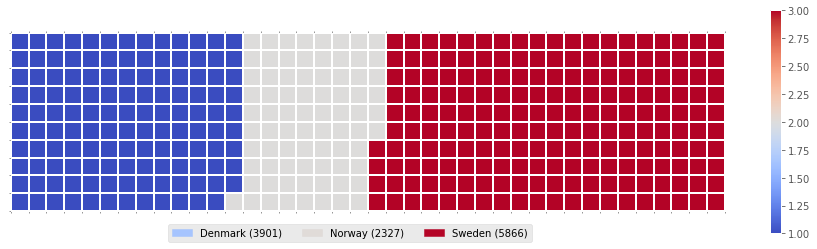

In [11]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (WIDTH), 1), minor=True)
ax.set_yticks(np.arange(-.5, (HEIGHT), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_sum = np.cumsum(df_dns['Total'])
total_values = values_sum[len(values_sum) - 1]

legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_sum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dns.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))

#### PART 4: DOWNLOAD & PREPARE DATA FOR WORD CLOUD

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [13]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    certifi:         2019.9.11-py36_0 anaconda --> 2019.9.11-py36_0     conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2019.10.16-0     anaconda --> 2019.9.11-hecc5488_0 conda-forge
    openssl:         1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [14]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt
alice_novel = open('alice_novel.txt', 'r').read()

In [15]:
stopwords = set(STOPWORDS)
stopwords.add('said')
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
alice_wc.generate(alice_novel)

#### PART 5: VISUALIZE DATA IN WORD CLOUD

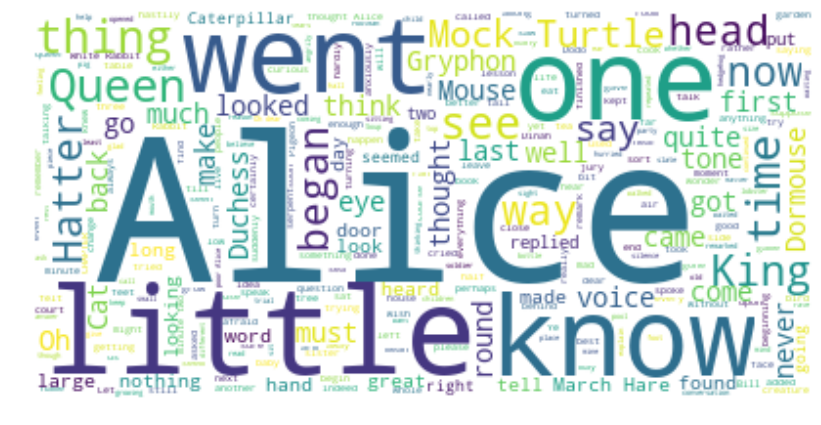

In [16]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
alice_mask = np.array(Image.open('alice_mask.png'))

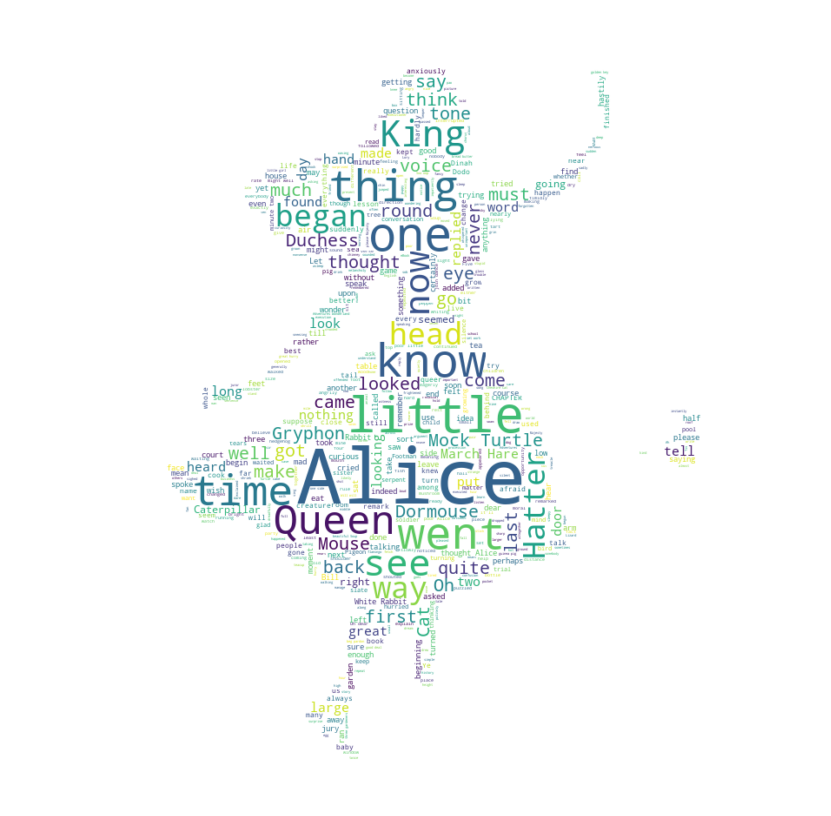

In [18]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()